<a href="https://www.kaggle.com/code/vantakulasatyakiran/bank-customers?scriptVersionId=132785617" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Bank Custmors Churn Detection

# DataSource
Kaggle

# Objective 
To Detect the what makes customers leaving bank

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import DataSet 

In [2]:
data = pd.read_csv('/kaggle/input/bank-customers/Churn Modeling.csv')

# Describe DataSet

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.isna().sum().sum()

0

# check Duplicate

In [8]:
data.duplicated('CustomerId').sum()

0

In [9]:
data = data.set_index('CustomerId')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


# Encode

In [11]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
values = {'France': 0, 'Germany':1, 'Spain':2}
data.replace(values, inplace = True)

In [13]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
values = {'Male': 0, 'Female' : 1}
data['Gender'].replace(values, inplace = True)

In [15]:
data.drop(['Surname'], axis = 1, inplace = True)

In [16]:
data.drop(['RowNumber'], axis = 1, inplace = True)

In [17]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,0,0,39,5,0.00,2,1,0,96270.64,0
15569892,516,0,0,35,10,57369.61,1,1,1,101699.77,0
15584532,709,0,1,36,7,0.00,1,0,1,42085.58,1


In [18]:
#chechking correlation
corr = data.corr()
corr['Exited']

CreditScore       -0.027094
Geography          0.035943
Gender             0.106512
Age                0.285323
Tenure            -0.014001
Balance            0.118533
NumOfProducts     -0.047820
HasCrCard         -0.007138
IsActiveMember    -0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

# Data Visualisation

<Axes: ylabel='Frequency'>

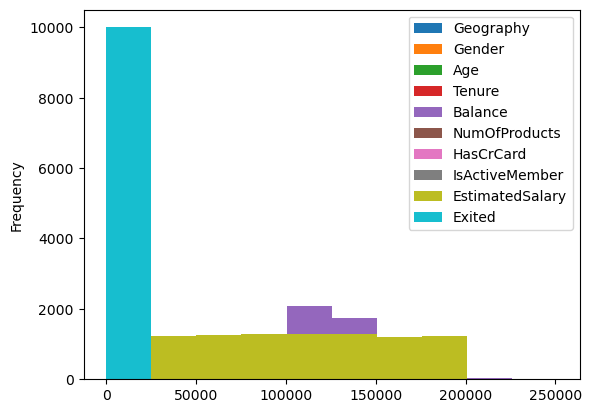

In [19]:
data.iloc[:, 1:].plot(kind = 'hist')

<Axes: xlabel='Exited', ylabel='count'>

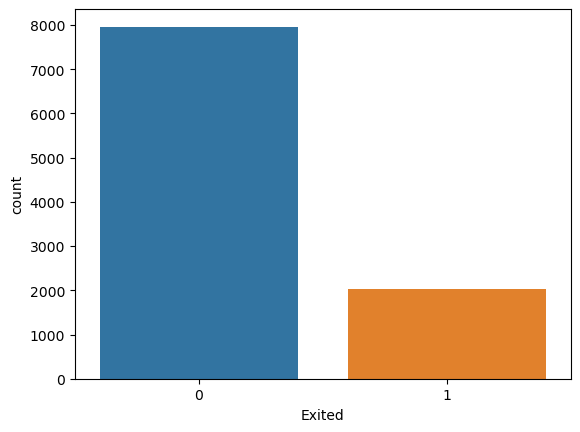

In [20]:
sns.countplot(x = 'Exited', data = data)

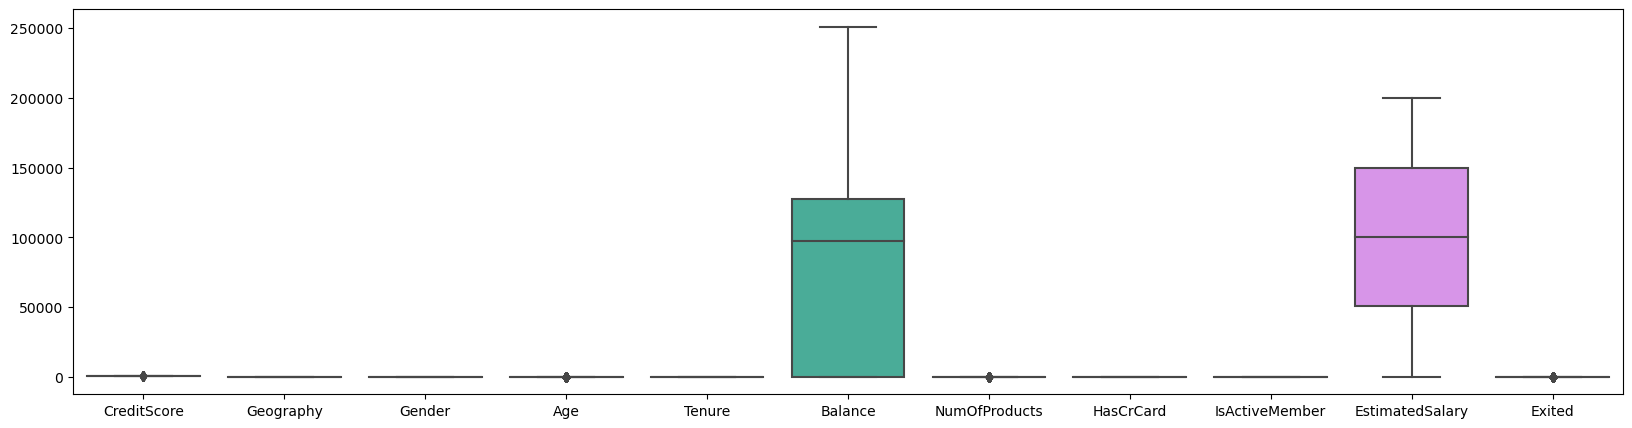

In [21]:
plt.figure(figsize = (20, 5))
sns.boxplot(data )
plt.show()

# Definif Target Variabes

In [22]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [23]:
x = data.drop(['Exited'], axis = 1)
y = data['Exited']
x.shape, y.shape

((10000, 10), (10000,))

# imbalance data

In [24]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Random Under Sampling 

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [26]:
rus = RandomUnderSampler()

In [27]:
X_rus, y_rus = rus.fit_resample(x, y)
X_rus.shape, y_rus.shape

((4074, 10), (4074,))

# Random OverSampling

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

In [29]:
X_ros, y_ros = ros.fit_resample(x, y)
X_ros.shape, y_ros.shape

((15926, 10), (15926,))

# Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

# Original Data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 1, test_size = 0.25)

# Under Sample Data

In [32]:
x_train_rus, x_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, random_state= 1, test_size = 0.25)

# Over Sample Data

In [33]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, random_state= 1, test_size = 0.25)

# Sandadisation

In [34]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# Model svc

In [35]:
from sklearn.svm import SVC
model = SVC()

In [36]:
x_train[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']] = scale.fit_transform(x_train[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']])
model.fit(x_train, y_train)

SVC()

In [37]:
x_test[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']] = scale.fit_transform(x_test[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']])

y_pred = model.predict(x_test)

# Accuracy

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
confusion_matrix(y_test, y_pred) #predicted all 0 correct and all 1 wrong due to under training

array([[1952,   28],
       [ 334,  186]])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1980
           1       0.87      0.36      0.51       520

    accuracy                           0.86      2500
   macro avg       0.86      0.67      0.71      2500
weighted avg       0.86      0.86      0.83      2500



# Under Sampling

In [41]:
from sklearn.svm import SVC
model = SVC()

In [42]:
x_train_rus[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']] = scale.fit_transform(x_train_rus[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']])
model.fit(x_train_rus, y_train_rus)

SVC()

In [43]:
x_test_rus[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']] = scale.fit_transform(x_test_rus[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']])
y_pred_rus = model.predict(x_test_rus)

In [44]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[391, 120],
       [140, 368]])

In [45]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       511
           1       0.75      0.72      0.74       508

    accuracy                           0.74      1019
   macro avg       0.75      0.74      0.74      1019
weighted avg       0.75      0.74      0.74      1019



# Over Sample

In [46]:
from sklearn.svm import SVC
model = SVC()


In [47]:
x_train_ros[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']] = scale.fit_transform(x_train_ros[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']])
model.fit(x_train_ros, y_train_ros)

SVC()

In [48]:
x_test_ros[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']] = scale.fit_transform(x_test_ros[['EstimatedSalary', 'Balance', 'Tenure', 'Age', 'CreditScore']])
y_pred_ros = model.predict(x_test_ros)

In [49]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[1570,  353],
       [ 495, 1564]])

In [50]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1923
           1       0.82      0.76      0.79      2059

    accuracy                           0.79      3982
   macro avg       0.79      0.79      0.79      3982
weighted avg       0.79      0.79      0.79      3982

